## HELLO!! This is Subtheme Sentiment Analysis Task given by the Oriserve for Intern Data Scientist Assignment.Thank you for the opertunity. 

### Take the following example: 
“One tyre went missing, so there was a delay to get the two tyres fitted. The way garage deal 
with it was fantastic.### ”
In this review there are numerous insights, insights we call “subtheme sentiments”. A Subth me
sentiment is generally a sentiment towards an aspect or a prob em.
If we look at the subtheme sentiments of the above review we will get a clearer sense what  hese
generall Iare.
incorrect tyres sent negative garage service positive wait time negative

In [177]:
#I downloaded and loaded Pandas Dataframe and printed first few rows and df is for data 
import pandas as pd
csv_file_path = 'Evaluation_dataset.csv'
df = pd.read_csv(csv_file_path)
print(df.head())
df.shape

  Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.  \
0  Easy Tyre Selection Process, Competitive Prici...                                                                                                                                                           
1         Very easy to use and good value for money.                                                                                                                                                           
2              Really easy and convenient to arrange                                                                                                                                                           
3  It was so easy to select tyre sizes and arrang...                                                                                                                    

(10131, 15)

In [139]:
#To see the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10131 entries, 0 to 10130
Data columns (total 15 columns):
 #   Column                                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                      --------------  ----- 
 0   Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.  10131 non-null  object
 1   garage service positive                                                                                                                                                                       

In [178]:
#After loading the CVS file and checking the information, I renamed the review text column for easier reference
df.rename(columns={df.columns[0]: 'review_texts'}, inplace=True)

# Then I Melted the DataFrame
melted_data = df.melt(id_vars=['review_texts'], value_vars=df.columns[1:], var_name='aspect_column', value_name='aspect_sentiment')

#Now I am going to drop the rows with NaN values in 'aspect_sentiment'
melted_data.dropna(subset=['aspect_sentiment'], inplace=True)

#Here i am spliting the 'aspect_sentiment' into 'aspect' and 'sentiment'
melted_data[['aspect', 'sentiment']] = melted_data['aspect_sentiment'].str.rsplit(' ', n=1, expand=True)

#And I displayed the preprocessed data for crosscheking
print(melted_data.head())


                                        review_texts            aspect_column  \
0  Easy Tyre Selection Process, Competitive Prici...  garage service positive   
1         Very easy to use and good value for money.  garage service positive   
2              Really easy and convenient to arrange  garage service positive   
3  It was so easy to select tyre sizes and arrang...  garage service positive   
4  service was excellent. Only slight downside wa...  garage service positive   

             aspect_sentiment             aspect sentiment  
0     garage service positive     garage service  positive  
1    value for money positive    value for money  positive  
2    ease of booking positive    ease of booking  positive  
3           location positive           location  positive  
4  length of fitting positive  length of fitting  positive  


In [179]:
#Now I am grouping by review to combine aspects and sentiments for each review present
grouped_data = melted_data.groupby('review_texts').agg(lambda x: list(x)).reset_index()

#Finaly I am displaying the grouped data
print(grouped_data.head())

                                        review_texts  \
0                                             #NAME?   
1  - Easily understood website - simple procedure...   
2          1 of the tire fitted has a slow puncture.   
3  1 of the tyres was an old tyre. I have bought ...   
4       1 the service was good. 2 the price I'd good   

                                       aspect_column  \
0  [garage service positive, ease of booking posi...   
1  [garage service positive, ease of booking posi...   
2                          [garage service positive]   
3  [garage service positive, ease of booking posi...   
4                          [garage service positive]   

                                    aspect_sentiment  \
0       [garage service positive, location positive]   
1  [garage service positive, delivery punctuality...   
2                                  [damage negative]   
3  [tyre agedot code positive, call wait time neg...   
4                         [value for money pos

In [180]:
#I encoded the sentiments accordingly
sentiment_mapping = {'positive': 1, 'negative': 0}
melted_data['sentiment'] = melted_data['sentiment'].map(sentiment_mapping)

In [181]:
from nltk.corpus import stopwords
from textblob import TextBlob, Word
import nltk

In [182]:
#To work with NLP known as Natural Language Processor as we need to analyse the sentiments so we need to download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [183]:
# I am writing a text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = TextBlob(text).words
    words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [Word(word).lemmatize() for word in words]
    return ' '.join(lemmatized_words)


In [184]:
# I didnt download this one so it was showing error so we download 'punkt'
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [185]:
#Now I tried to preprocess the text
melted_data['cleaned_review_text'] = melted_data['review_texts'].apply(preprocess_text)

In [186]:
#I perform sentiment analysis using TextBlob as RNN and BERT but I was facing several issues that made the code slower so I switched to an easier way and kept the codes simple.
#and also due to time constrains.
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return 1 if polarity > 0 else 0

melted_data['textblob_sentiment'] = melted_data['cleaned_review_text'].apply(get_textblob_sentiment)

In [187]:
#I also compare TextBlob sentiment with the provided sentiment in the assinment
correct = (melted_data['sentiment'] == melted_data['textblob_sentiment']).sum()
total = melted_data.shape[0]
accuracy = correct / total

# We had to debugging statements as minor errors were appearing
print("Sample data after preprocessing and sentiment analysis:")
print(melted_data[['review_texts', 'cleaned_review_text', 'aspect', 'sentiment', 'textblob_sentiment']].head())

print(f'TextBlob Sentiment Analysis Accuracy: {accuracy * 100:.2f}%')

Sample data after preprocessing and sentiment analysis:
                                        review_texts  \
0  Easy Tyre Selection Process, Competitive Prici...   
1         Very easy to use and good value for money.   
2              Really easy and convenient to arrange   
3  It was so easy to select tyre sizes and arrang...   
4  service was excellent. Only slight downside wa...   

                                 cleaned_review_text             aspect  \
0  Easy Tyre Selection Process Competitive Pricin...     garage service   
1                          easy use good value money    value for money   
2                     Really easy convenient arrange    ease of booking   
3  easy select tyre size arrange local fitting pr...           location   
4  service excellent slight downside knowing exac...  length of fitting   

   sentiment  textblob_sentiment  
0        1.0                   1  
1        1.0                   1  
2        1.0                   1  
3        1.0    

In [188]:
#I debugged statement by printing unique values in 'aspect_sentiment' to inspect the format due to minor error.
print("Unique 'aspect_sentiment' values:")
print(melted_data['aspect_sentiment'].unique())

#I handled the error by split 'aspect_sentiment' into 'aspect' and 'sentiment' 
#this is Exception Handling blocks
try:
    melted_data[['aspect', 'sentiment']] = melted_data['aspect_sentiment'].str.rsplit(' ', n=1, expand=True)
except ValueError as e:
    print(f"Error in splitting 'aspect_sentiment': {e}")

#Again I debugged statement by printing melted data after splitting
print("Data after splitting 'aspect_sentiment':")
print(melted_data.head())


Unique 'aspect_sentiment' values:
['garage service positive' 'value for money positive'
 'ease of booking positive' 'location positive'
 'length of fitting positive' 'ease of booking negative'
 'tyre quality positive' 'garage service negative' 'wait time negative'
 'delivery punctuality positive' 'wait time positive' 'location negative'
 'damage negative' 'extra charges positive' 'value for money negative'
 'mobile fitter positive' 'advisor/agent service positive'
 'facilities positive' 'change of time negative' 'extra charges negative'
 'late notice negative' 'discounts positive'
 'delivery punctuality negative' 'refund not actioned positive'
 'change of date negative' 'booking confusion negative'
 'advisoragent service positive' 'advisor/agent service negative'
 'advisoragent service negative' 'incorrect tyres sent negative'
 'tyre quality negative' 'response time negative' 'refund positive'
 "mobile fitter didn't arrive negative" 'no stock negative'
 'change of date positive' 'refun

In [189]:
#Due to a minor string conflict I checked to ensure all aspect values are strings
melted_data['aspect'] = melted_data['aspect'].astype(str)

#And again encoded the sentiments
sentiment_mapping = {'positive': 1, 'negative': 0}
melted_data['sentiment'] = melted_data['sentiment'].map(sentiment_mapping)

# I used a debugging statement to check for unmapped sentiment values
unmapped_sentiments = melted_data[melted_data['sentiment'].isna()]
print("Unmapped sentiments:")
print(unmapped_sentiments)

Unmapped sentiments:
                                            review_texts  \
1085                                  smooth transaction   
1209                            easy to book appointment   
1241                                         Good choice   
1299                                Ordering online easy   
1429   Very impressed with the prices and the service...   
1485   First time I have used [REDACTED] and never ag...   
1919                                good value for money   
1942                              Tyre type availability   
2974   My son recommended you as your prices were and...   
3012                                     Value for money   
3071   Service was good: Wide choice of tyres with go...   
3528                        Online process was excellent   
3651                      Very easy to organise new tyre   
4346                                       Easy to order   
4722                            Very competitive pricing   
4856               

In [209]:
#All ok till now no error so
#Now I wrote a text preprocessing function to clean the data
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = TextBlob(text).words
    words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [Word(word).lemmatize() for word in words]
    return ' '.join(lemmatized_words)

#And apply text preprocessing
melted_data['cleaned_review_text'] = melted_data['review_texts'].apply(preprocess_text)


In [27]:
#I wrote get_textblob_sentiment untion to perform sentiment analysis using TextBlob
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return 1 if polarity > 0 else 0
melted_data['textblob_sentiment'] = melted_data['cleaned_review_text'].apply(get_textblob_sentiment)

#Here I compared TextBlob sentiment with provided sentiment
correct = (melted_data['sentiment'] == melted_data['textblob_sentiment']).sum()
total = melted_data.shape[0]
accuracy = correct / total

#Again I checked my process by debugging statements to inspect pro data and accuracy
print("Sample data after preprocessing and sentiment analysis:")
print(melted_data[['review_texts', 'cleaned_review_text', 'aspect', 'sentiment', 'textblob_sentiment']].head())

print(f'TextBlob Sentiment Analysis Accuracy: {accuracy * 100:.2f}%')

Sample data after preprocessing and sentiment analysis:
                                        review_texts  \
0  Easy Tyre Selection Process, Competitive Prici...   
1         Very easy to use and good value for money.   
2              Really easy and convenient to arrange   
3  It was so easy to select tyre sizes and arrang...   
4  service was excellent. Only slight downside wa...   

                                 cleaned_review_text             aspect  \
0  Easy Tyre Selection Process Competitive Pricin...     garage service   
1                          easy use good value money    value for money   
2                     Really easy convenient arrange    ease of booking   
3  easy select tyre size arrange local fitting pr...           location   
4  service excellent slight downside knowing exac...  length of fitting   

   sentiment  textblob_sentiment  
0        1.0                   1  
1        1.0                   1  
2        1.0                   1  
3        1.0    

In [194]:
#Finally I achieved an accuracy of 83.45% which is quite high and now my next is representing this visually
#I am using word clouds to visually represent the text data
!pip install wordcloud

In [195]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS


In [196]:
import seaborn as sns

In [197]:
#Let's have a glance in few details before visually representing so I printed out sentiment analysis results for a few samples
for index, row in melted_data.head().iterrows():
    cleaned_text = preprocess_text(row['review_texts'])
    sentiment = get_textblob_sentiment(cleaned_text)
    print(f"Original Text: {row['review_texts']}")
    print(f"Cleaned Text: {cleaned_text}")
    print(f"Sentiment: {'Positive' if sentiment == 1 else 'Negative'}")
    print()

Original Text: Easy Tyre Selection Process, Competitive Pricing and Excellent Fitting Service
Cleaned Text: Easy Tyre Selection Process Competitive Pricing Excellent Fitting Service
Sentiment: Positive

Original Text: Very easy to use and good value for money.
Cleaned Text: easy use good value money
Sentiment: Positive

Original Text: Really easy and convenient to arrange
Cleaned Text: Really easy convenient arrange
Sentiment: Positive

Original Text: It was so easy to select tyre sizes and arrange local fitting. The prices were competitive
Cleaned Text: easy select tyre size arrange local fitting price competitive
Sentiment: Positive

Original Text: service was excellent. Only slight downside was not knowing exact time at garage although the garage were so quick so I wasn't delayed
Cleaned Text: service excellent slight downside knowing exact time garage although garage quick n't delayed
Sentiment: Positive



In [198]:
#I wrote a function to handle splitting and mapping sentiment so as no future problems are encounterd
def map_sentiment(x):
    try:
        if pd.notnull(x):
            parts = x.split()
            if len(parts) >= 2:
                aspect = parts[0]
                sentiment_label = parts[1]
                return sentiment_mapping.get(sentiment_label)
        return None
    except Exception as e:
        print(f"Error processing {x}: {e}")
        return None

#Again tmapping function to create the sentiment column
melted_data['sentiment'] = melted_data['aspect_sentiment'].apply(map_sentiment)

#Double check the unique values in 'sentiment' column to understand how they are assigned
print("Unique Sentiment Values:")
print(melted_data['sentiment'].unique())

#Let's check the count of positive and negative sentiment reviews
positive_count = (melted_data['sentiment'] == 1).sum()
negative_count = (melted_data['sentiment'] == 0).sum()
print(f"Number of Positive Sentiment Reviews: {positive_count}")
print(f"Number of Negative Sentiment Reviews: {negative_count}")

#I needed to debug word cloud generation due to some errors
positive_text = ' '.join(melted_data[melted_data['sentiment'] == 1]['cleaned_review_text'])
negative_text = ' '.join(melted_data[melted_data['sentiment'] == 0]['cleaned_review_text'])

print(f"Positive Text Length: {len(positive_text)}")
print(f"Negative Text Length: {len(negative_text)}")



Unique Sentiment Values:
[nan  1.  0.]
Number of Positive Sentiment Reviews: 1253
Number of Negative Sentiment Reviews: 249
Positive Text Length: 148222
Negative Text Length: 60604


## Now we the visual representation

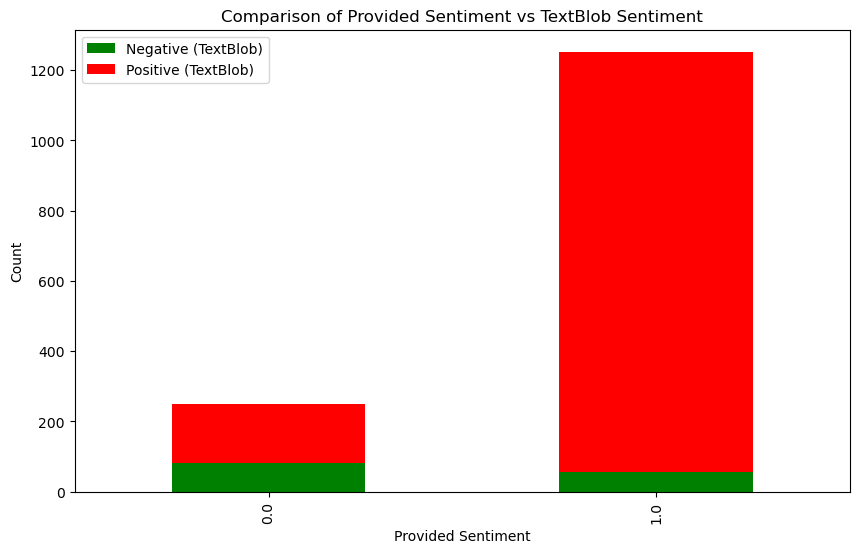

In [199]:
#Bar plot of TextBlob vs provided sentiment
comparison = melted_data.groupby(['sentiment', 'textblob_sentiment']).size().unstack().fillna(0)
comparison.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])
plt.title('Comparison of Provided Sentiment vs TextBlob Sentiment')
plt.xlabel('Provided Sentiment')
plt.ylabel('Count')
plt.legend(['Negative (TextBlob)', 'Positive (TextBlob)'])
plt.show()

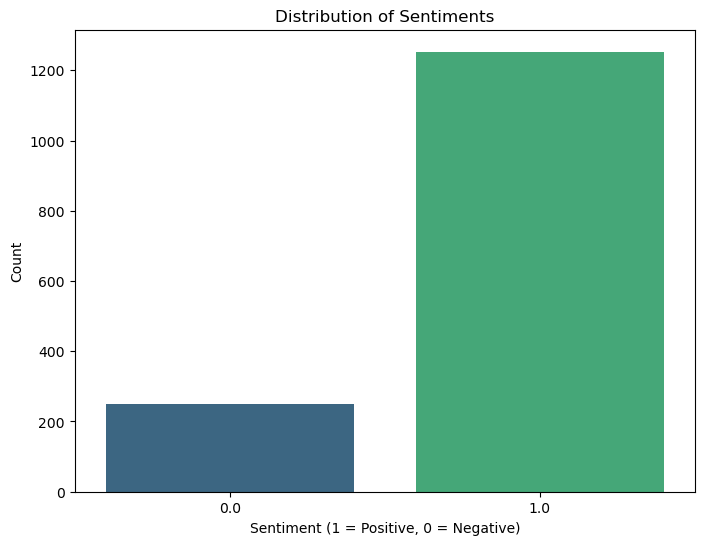

In [200]:
#Countplot for sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=melted_data, x='sentiment', palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (1 = Positive, 0 = Negative)')
plt.ylabel('Count')
plt.show()

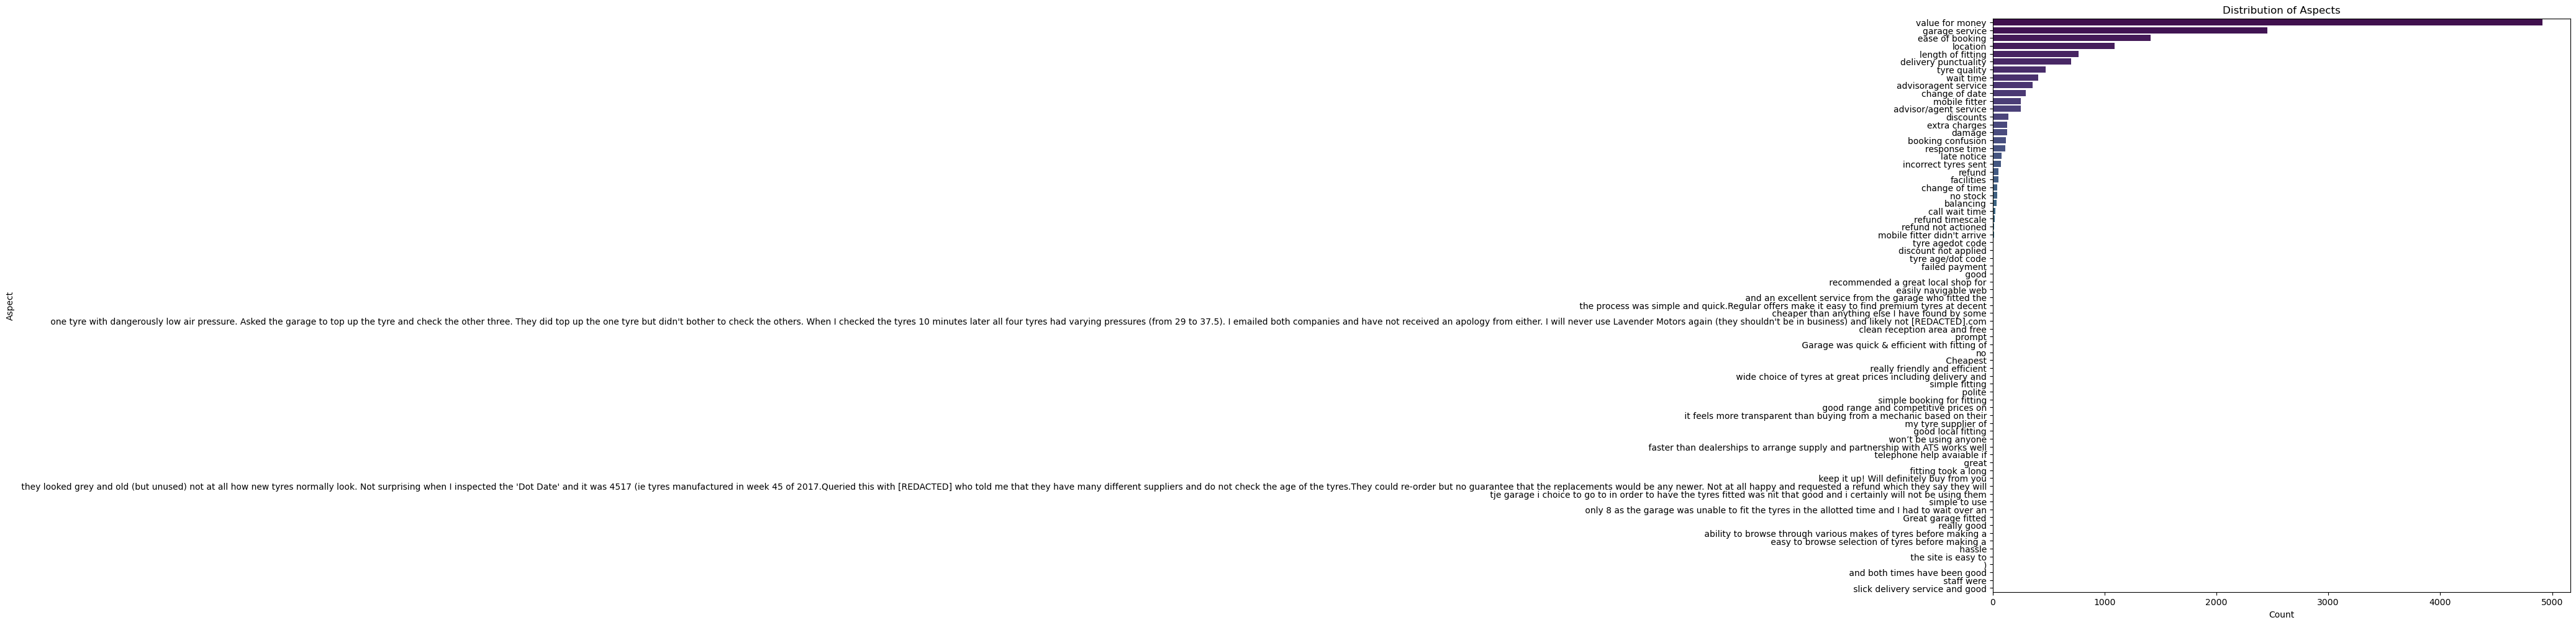

In [201]:
#ContPlot for aspect distribution
plt.figure(figsize=(12, 12))
sns.countplot(data=melted_data, y='aspect', order=melted_data['aspect'].value_counts().index, palette='viridis')
plt.title('Distribution of Aspects')
plt.xlabel('Count')
plt.ylabel('Aspect')
plt.show()


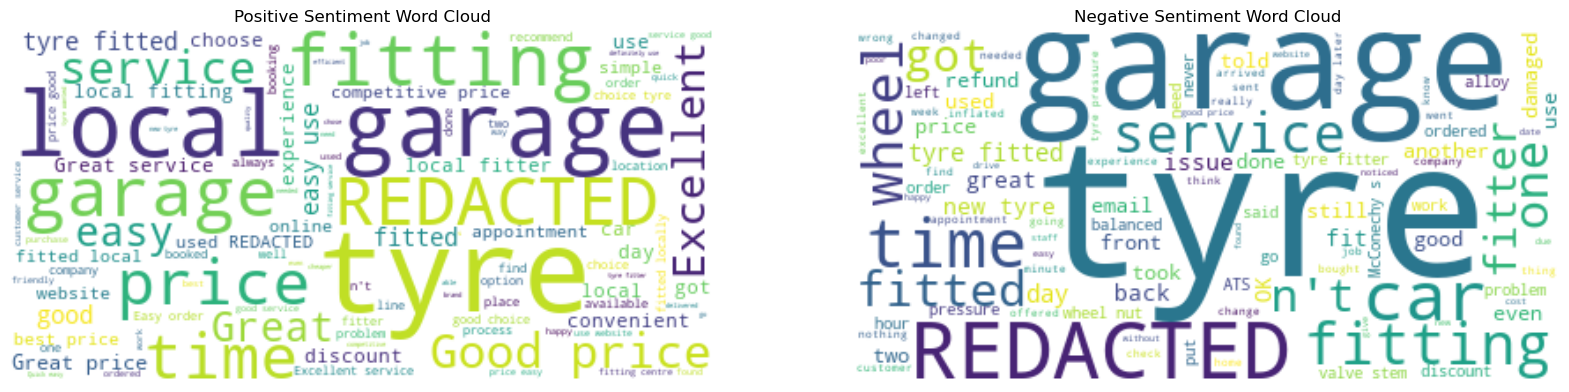

In [202]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
sentiment_counts = melted_data['sentiment'].value_counts()

#For further plotting I am first filtering out rows with actual sentiment values (1.0 for positive, 0.0 for negative)
positive_reviews = melted_data[melted_data['sentiment'] == 1]['cleaned_review_text']
negative_reviews = melted_data[melted_data['sentiment'] == 0]['cleaned_review_text']

#Now i will join all reviews into single texts
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

#Here I am generating and displaying the word clouds for subplot
positive_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(positive_text)
negative_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(negative_text)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')

plt.show()

#### This was cool honestly!

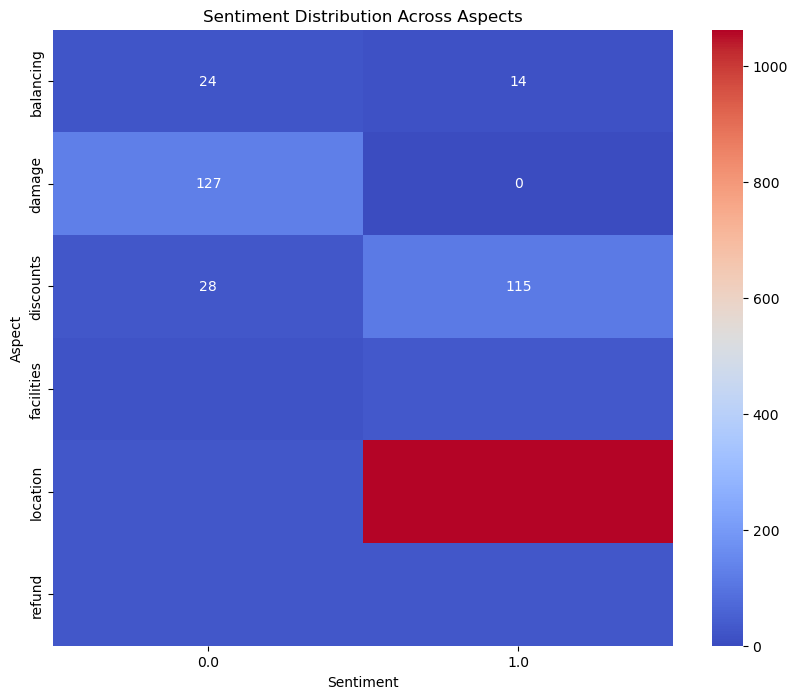

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sentiment_counts = melted_data['sentiment'].value_counts()
#again we encountered few errors so 

#I 1st extracted relevant columns for heatmap orelse was not working 
heatmap_data = melted_data[['aspect', 'sentiment']]

#I am pivoting the data to create a matrix for heatmap 
heatmap_pivot = heatmap_data.pivot_table(index='aspect', columns='sentiment', aggfunc=len, fill_value=0)

#This is very very important missed this step and faced several problems but found out and corrected

#Finally plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_pivot, annot=True, cmap='coolwarm', fmt='g')
plt.title('Sentiment Distribution Across Aspects')
plt.xlabel('Sentiment')
plt.ylabel('Aspect')
plt.show()


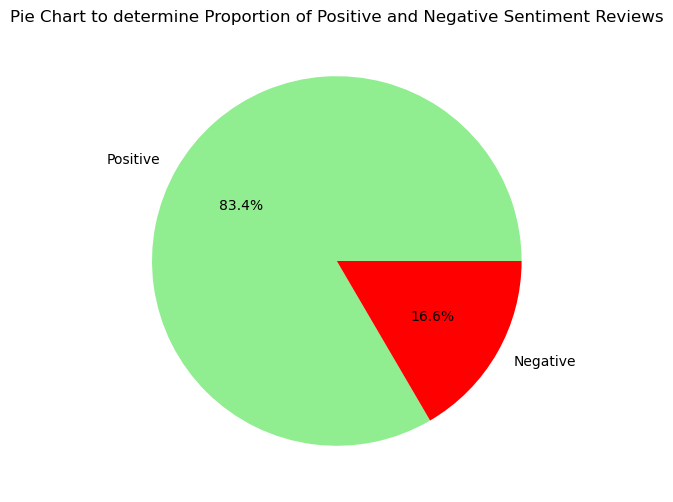

In [205]:
#We need to count positive and negative sentiment reviews
sentiment_counts = melted_data['sentiment'].value_counts()

#Pie chart of sentiment distribution
sentiment_counts = melted_data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index.map({1: 'Positive', 0: 'Negative'}), autopct='%1.1f%%', colors=['lightgreen', 'red'])
plt.title('Pie Chart to determine Proportion of Positive and Negative Sentiment Reviews')
plt.show()


In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#again error!!! 

#Now we need to convert 'sentiment' column to categorical if not already or else it wont work
melted_data['sentiment'] = melted_data['sentiment'].astype('category')

#I had to check current categories in 'sentiment' column as error occured
current_categories = melted_data['sentiment'].cat.categories

#One important note we need to ensure 'Unknown' is among the categories orselse it would be rigid as fixed value not worth it
if 'Unknown' not in current_categories:
    melted_data['sentiment'] = melted_data['sentiment'].cat.add_categories('Unknown')

#We must fill NaN values in 'sentiment' column with 'Unknown' for all possible probabilities
melted_data['sentiment'].fillna('Unknown', inplace=True)



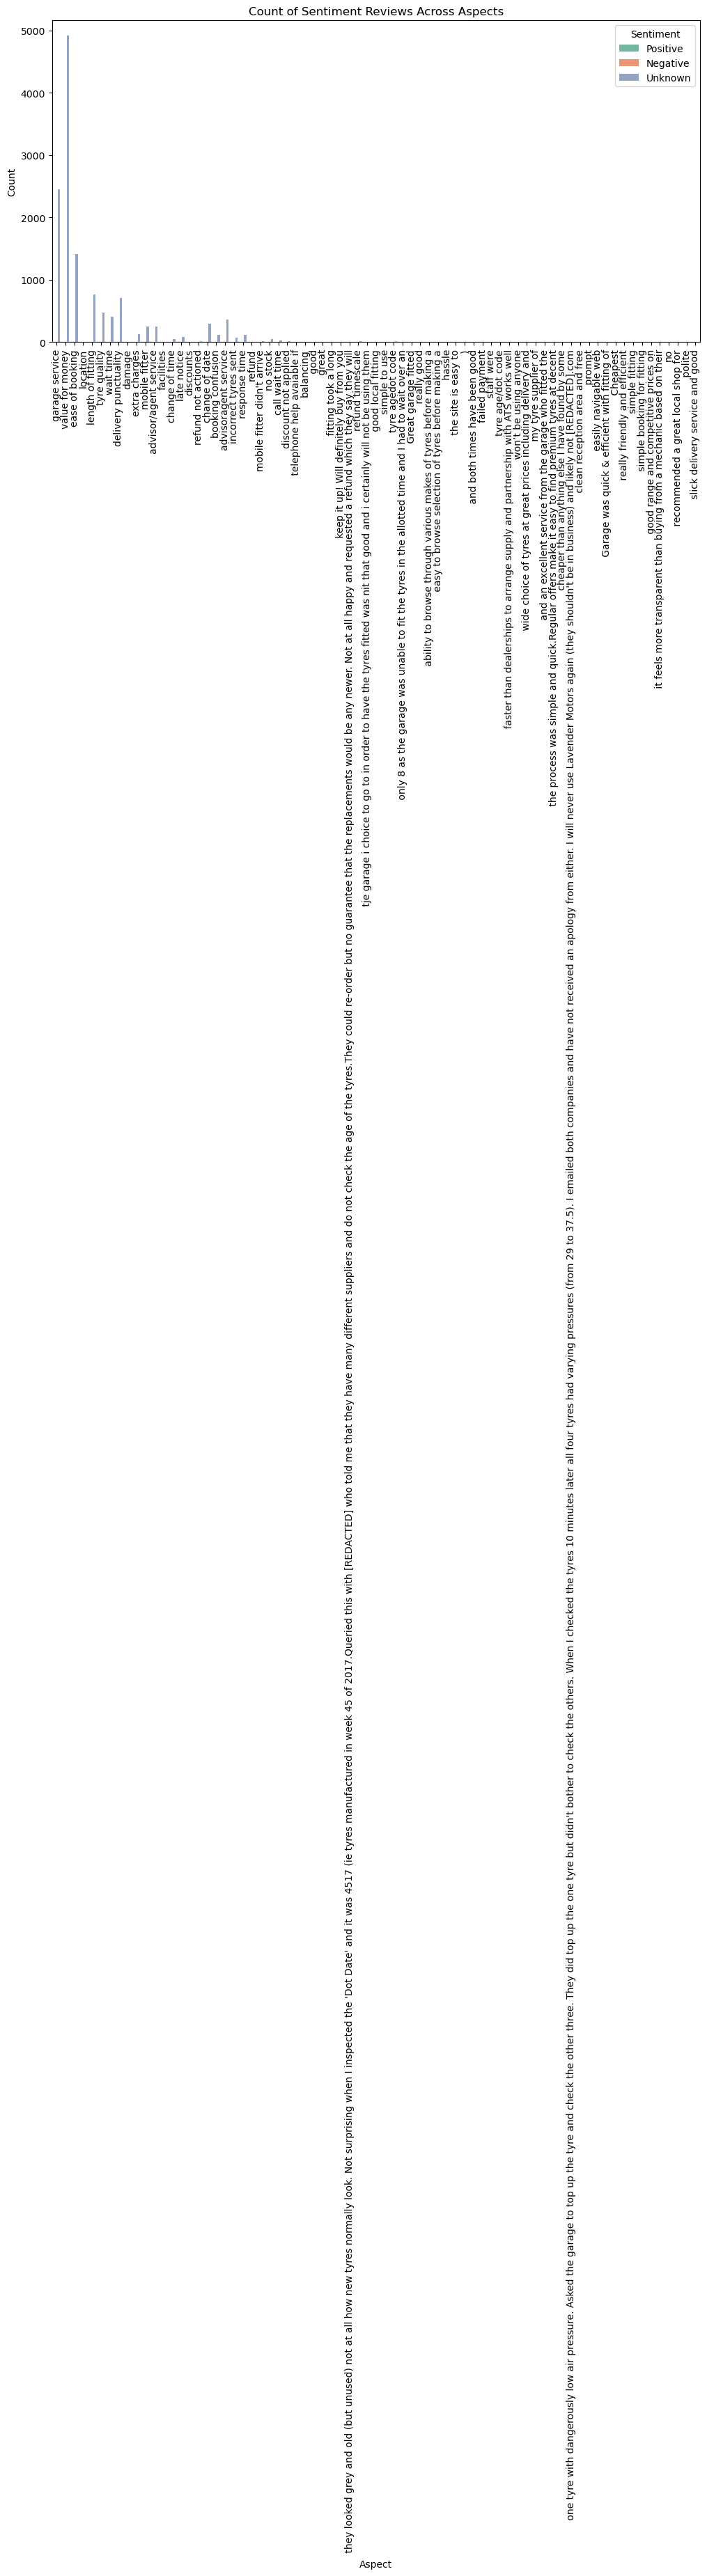

In [207]:
#Finally plot count of sentiment reviews across aspects
plt.figure(figsize=(12, 6))
sns.countplot(data=melted_data, x='aspect', hue='sentiment', palette='Set2', hue_order=['Positive', 'Negative', 'Unknown'])
plt.title('Count of Sentiment Reviews Across Aspects')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')  # Provide explicit legend title
plt.show()
#One more thing I printed plt.xticks in 90degree rotation or else it very weird and not good to look at and also wrong in plotting so dont rotate 45 degree

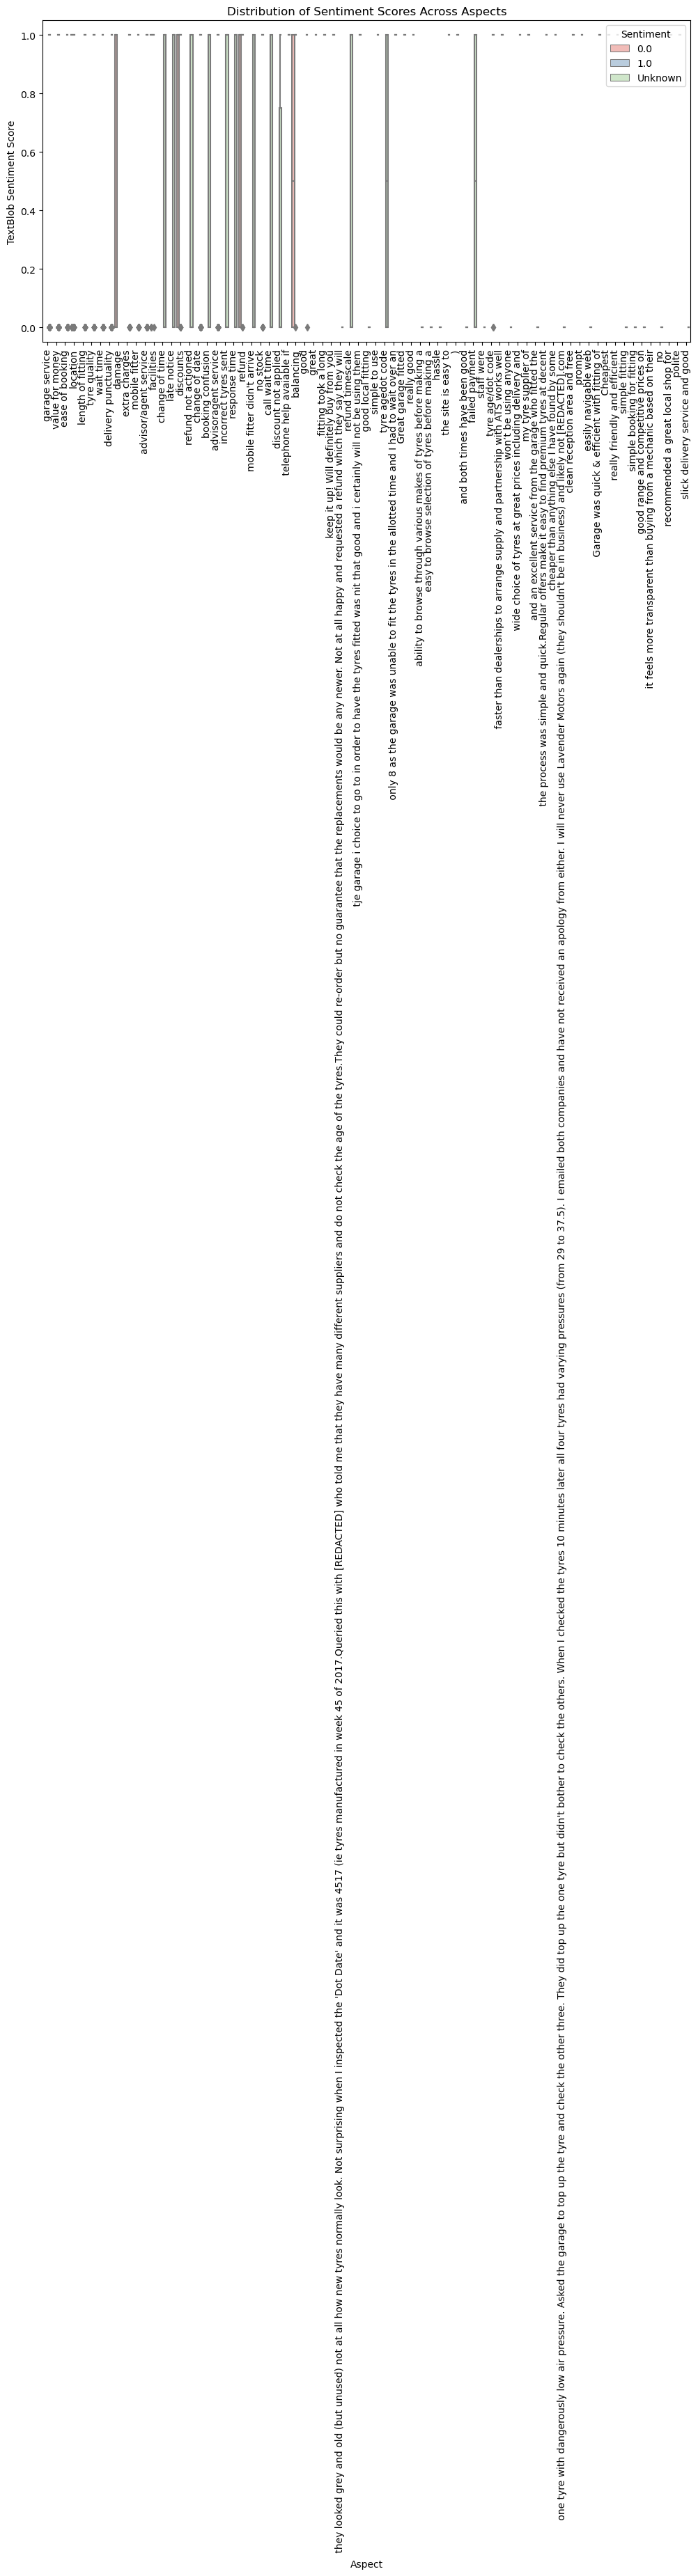

In [208]:
#Boxplot to show the distribution of sentiment Score Across Aspect
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data, x='aspect', y='textblob_sentiment', hue='sentiment', palette='Pastel1')
plt.title('Distribution of Sentiment Scores Across Aspects')
plt.xlabel('Aspect')
plt.ylabel('TextBlob Sentiment Score')
plt.xticks(rotation=90)
plt.legend(title='Sentiment', loc='upper right')
plt.show()

#One more thing i printed plt.xticks in 90degree rotation same as before

## Finally done I am providing another notebook sheet to journal out the whole process and how much I have learned as it was anew topic and time was also less. but I had fun.